In [387]:
import numpy as np
import pandas as pd 

data_path = ''

train = pd.read_csv(data_path + 'train/train.csv')

In [388]:
#hour angle 추가
h_list=[]
len(train['Hour'])
for i in range(len(train['Hour'])):
  h=train.loc[i,'Hour']
  min=train.loc[i,'Minute']
  if min!=30:
    hour_angle=15*(h-12)-7.5
    h_list.append(hour_angle)
  else:
    hour_angle=15*(h-12)
    h_list.append(hour_angle)

train['h']=h_list

In [389]:
train.head()

,Day,Hour,Minute,DHI,DNI,WS,RH,T,TARGET,h
0,0,0,0,0,0,1.5,69.08,-12,0.0,-187.5
1,0,0,30,0,0,1.5,69.06,-12,0.0,-180.0
2,0,1,0,0,0,1.6,71.78,-12,0.0,-172.5
3,0,1,30,0,0,1.6,71.75,-12,0.0,-165.0
4,0,2,0,0,0,1.6,75.20,-12,0.0,-157.5


In [390]:
# Time 변수 생성 
train['Time'] = train['Hour'] * 60 + train['Minute']
train.to_csv('train.csv')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52560 entries, 0 to 52559
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Day     52560 non-null  int64  
 1   Hour    52560 non-null  int64  
 2   Minute  52560 non-null  int64  
 3   DHI     52560 non-null  int64  
 4   DNI     52560 non-null  int64  
 5   WS      52560 non-null  float64
 6   RH      52560 non-null  float64
 7   T       52560 non-null  int64  
 8   TARGET  52560 non-null  float64
 9   h       52560 non-null  float64
 10  Time    52560 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 4.4 MB


In [391]:
train['Cos'] = np.cos(2*np.pi*(train['Time']/24/60))
train['Sin'] = np.sin(2*np.pi*(train['Time']/24/60))

In [392]:
train.head()

,Day,Hour,Minute,DHI,DNI,WS,RH,T,TARGET,h,Time,Cos,Sin
0,0,0,0,0,0,1.5,69.08,-12,0.0,-187.5,0,1.000000,0.000000
1,0,0,30,0,0,1.5,69.06,-12,0.0,-180.0,30,0.991445,0.130526
2,0,1,0,0,0,1.6,71.78,-12,0.0,-172.5,60,0.965926,0.258819
3,0,1,30,0,0,1.6,71.75,-12,0.0,-165.0,90,0.923880,0.382683
4,0,2,0,0,0,1.6,75.20,-12,0.0,-157.5,120,0.866025,0.500000


In [393]:
b = 17.62
c = 243.12
r = np.log(train['RH']/100)+((b*train['T'])/(c+train['T']))
train['Td'] = (c*r)/(b-r)

In [394]:
# 날짜별 데이터프레임 쪼개기
train_day = []
list_day = [] 
DAY = 0

for n in range(0,train.shape[0]):

    if train.loc[n, 'Day'] == DAY:
        list_day.append(train.loc[n, ['Time','TARGET']])
        
    else:
        day = pd.DataFrame(list_day, columns = ['Time', 'TARGET'], index = range(0,48))
        train_day.append(day)

        list_day = []
        list_day.append(train.loc[n, ['Time','TARGET']])
    DAY = train.loc[n, 'Day']



In [395]:
print(train_day)

[      Time     TARGET
0      0.0   0.000000
1     30.0   0.000000
2     60.0   0.000000
3     90.0   0.000000
4    120.0   0.000000
5    150.0   0.000000
6    180.0   0.000000
7    210.0   0.000000
8    240.0   0.000000
9    270.0   0.000000
10   300.0   0.000000
11   330.0   0.000000
12   360.0   0.000000
13   390.0   0.000000
14   420.0   0.000000
15   450.0   0.000000
16   480.0   7.039287
17   510.0   5.912871
18   540.0  22.337268
19   570.0  29.469529
20   600.0  25.339762
21   630.0  25.152060
22   660.0  28.718397
23   690.0  33.129393
24   720.0  19.427151
25   750.0  25.715166
26   780.0  24.589225
27   810.0  21.304405
28   840.0  11.731500
29   870.0  14.734764
30   900.0   5.818888
31   930.0   7.602096
32   960.0   4.035725
33   990.0   0.938541
34  1020.0   0.000000
35  1050.0   0.000000
36  1080.0   0.000000
37  1110.0   0.000000
38  1140.0   0.000000
39  1170.0   0.000000
40  1200.0   0.000000
41  1230.0   0.000000
42  1260.0   0.000000
43  1290.0   0.000000
44  1320.

In [396]:
# 일출시간, 일몰시간 구하기
new = pd.DataFrame(columns = ['Day', '일출시간', '일몰시간', '일조시간'])

for i in range(0,len(train_day)):
    for d1 in range(0,48):
        if train_day[i].loc[d1,'TARGET'] != 0:
            sunrise = train_day[i].loc[d1,'Time']
            break

    for d2 in range(47,-1,-1):
        if train_day[i].loc[d2,'TARGET'] != 0:
            sunset = train_day[i].loc[d2 + 1,'Time']
            break
        
    new.loc[i] = [i, sunrise, sunset, sunset - sunrise]

new.to_csv('new.csv')

In [397]:
new_train = pd.read_csv('new.csv')

In [398]:
new_train.head()

,Unnamed: 0,Day,일출시간,일몰시간,일조시간
0,0,0.0,480.0,1020.0,540.0
1,1,1.0,480.0,1020.0,540.0
2,2,2.0,480.0,1020.0,540.0
3,3,3.0,480.0,1020.0,540.0
4,4,4.0,480.0,1020.0,540.0


In [399]:
# 하지, 동지 구하기

summer = new.loc[new['일조시간'].idxmax(), 'Day']
winter = new.loc[new['일조시간'].idxmin(), 'Day']

print(summer, winter)

# 138 + 195 = 233 -> 1월 1일

138.0 356.0


In [400]:
N=[]
#1월 1일 기준 N+171 = 하지 기준 N
for i in range(len(train['Day'])):
  day=train.loc[i,'Day']
  if day==summer:
    N.append(+171)
  else:
    N.append(day-summer+171)


#N Feature 생성
#N이 음수, 364 초과를 변환(1월 1일 기준 N=0)
train['N']=N
day_max=train['N'].max()
day_min=train['N'].min()

while day_max>364 or day_max<0:
  for i in range(len(train['N'])):
    day=train.loc[i,'N']
    if day<0:
      train.loc[i,'N']=day+365
    elif day>364:
      train.loc[i,'N']=day-365
    else:
      pass
  day_max=train['N'].max()
  day_min=train['N'].min()

#현재 N은 한국 기준이므로, UT로 변환
train['N']-=0.375


In [401]:
#Declination of the Sun

def radian_angle(x):
  return x*np.pi/180

def dec_sun(N):
  return -1*np.arcsin(0.39779*np.cos(radian_angle(0.98565)*(N+10)+radian_angle(1.914)*np.sin(radian_angle(0.98565)*(N-2))))

train['Declination']=dec_sun(train['N'])

In [402]:
train.head()

,Day,Hour,Minute,DHI,DNI,WS,RH,T,TARGET,h,Time,Cos,Sin,Td,N,Declination
0,0,0,0,0,0,1.5,69.08,-12,0.0,-187.5,0,1.000000,0.000000,-16.522271,32.625,-0.295314
1,0,0,30,0,0,1.5,69.06,-12,0.0,-180.0,30,0.991445,0.130526,-16.525742,32.625,-0.295314
2,0,1,0,0,0,1.6,71.78,-12,0.0,-172.5,60,0.965926,0.258819,-16.061776,32.625,-0.295314
3,0,1,30,0,0,1.6,71.75,-12,0.0,-165.0,90,0.923880,0.382683,-16.066807,32.625,-0.295314
4,0,2,0,0,0,1.6,75.20,-12,0.0,-157.5,120,0.866025,0.500000,-15.500215,32.625,-0.295314


In [403]:
#Zenith Angle

#관측자 위도 설정
alt=37.54

def zenith_angle(altitude,declination,hour_angle):
  return np.sin(radian_angle(altitude))*np.sin(declination)+np.cos(radian_angle(altitude))*np.cos(declination)*np.cos(radian_angle(hour_angle))

train['Zenith_Angle']=zenith_angle(alt,train['Declination'],train['h'])

In [404]:
train.head()

,Day,Hour,Minute,DHI,DNI,WS,RH,T,TARGET,h,Time,Cos,Sin,Td,N,Declination,Zenith_Angle
0,0,0,0,0,0,1.5,69.08,-12,0.0,-187.5,0,1.000000,0.000000,-16.522271,32.625,-0.295314,-0.929448
1,0,0,30,0,0,1.5,69.06,-12,0.0,-180.0,30,0.991445,0.130526,-16.525742,32.625,-0.295314,-0.935938
2,0,1,0,0,0,1.6,71.78,-12,0.0,-172.5,60,0.965926,0.258819,-16.061776,32.625,-0.295314,-0.929448
3,0,1,30,0,0,1.6,71.75,-12,0.0,-165.0,90,0.923880,0.382683,-16.066807,32.625,-0.295314,-0.910089
4,0,2,0,0,0,1.6,75.20,-12,0.0,-157.5,120,0.866025,0.500000,-15.500215,32.625,-0.295314,-0.878193


In [405]:
#GHI

train['GHI']=train['DHI']+train['DNI']*train['Zenith_Angle']

In [406]:
train.head(226)

,Day,Hour,Minute,DHI,DNI,WS,RH,T,TARGET,h,Time,Cos,Sin,Td,N,Declination,Zenith_Angle,GHI
0,0,0,0,0,0,1.5,69.08,-12,0.000000,-187.5,0,1.000000,0.000000,-16.522271,32.625,-0.295314,-0.929448,0.000000
1,0,0,30,0,0,1.5,69.06,-12,0.000000,-180.0,30,0.991445,0.130526,-16.525742,32.625,-0.295314,-0.935938,0.000000
2,0,1,0,0,0,1.6,71.78,-12,0.000000,-172.5,60,0.965926,0.258819,-16.061776,32.625,-0.295314,-0.929448,0.000000
3,0,1,30,0,0,1.6,71.75,-12,0.000000,-165.0,90,0.923880,0.382683,-16.066807,32.625,-0.295314,-0.910089,0.000000
4,0,2,0,0,0,1.6,75.20,-12,0.000000,-157.5,120,0.866025,0.500000,-15.500215,32.625,-0.295314,-0.878193,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221,4,14,30,142,100,7.1,74.91,5,16.422476,30.0,870,-0.793353,-0.608761,0.916693,36.625,-0.274578,0.495762,191.576179
222,4,15,0,96,4,6.9,74.50,5,9.196587,37.5,900,-0.707107,-0.707107,0.840418,36.625,-0.274578,0.440297,97.761187
223,4,15,30,68,0,6.4,80.02,4,6.381375,45.0,930,-0.608761,-0.793353,0.862829,36.625,-0.274578,0.374471,68.000000
224,4,16,0,38,0,6.0,78.19,4,3.566063,52.5,960,-0.500000,-0.866025,0.541769,36.625,-0.274578,0.299412,38.000000


In [407]:
test = pd.read_csv(data_path+'test/0.csv')
for i in range(1,81):
    data_path1 = data_path + 'test/' + str(i) +'.csv'
    test1 = pd.read_csv(data_path1)
    test = test.append(test1, ignore_index = True)

C:\Users\kim\AppData\Local\Temp\ipykernel_32888\1343246536.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test = test.append(test1, ignore_index = True)
C:\Users\kim\AppData\Local\Temp\ipykernel_32888\1343246536.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test = test.append(test1, ignore_index = True)
C:\Users\kim\AppData\Local\Temp\ipykernel_32888\1343246536.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test = test.append(test1, ignore_index = True)
C:\Users\kim\AppData\Local\Temp\ipykernel_32888\1343246536.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test = test.append(test1, ignore_index = True)
C:\Users\kim

In [408]:
test.tail()

,Day,Hour,Minute,DHI,DNI,WS,RH,T,TARGET
27211,6,21,30,0,0,0.8,63.35,13.7,0.0
27212,6,22,0,0,0,0.7,64.82,13.1,0.0
27213,6,22,30,0,0,0.7,66.10,12.8,0.0
27214,6,23,0,0,0,0.6,67.64,12.4,0.0
27215,6,23,30,0,0,0.6,69.44,12.0,0.0


In [409]:
#hour angle 추가
h_list=[]
len(test['Hour'])
for i in range(len(test['Hour'])):
  h=test.loc[i,'Hour']
  min=test.loc[i,'Minute']
  if min!=30:
    hour_angle=15*(h-12)-7.5
    h_list.append(hour_angle)
  else:
    hour_angle=15*(h-12)
    h_list.append(hour_angle)

test['h']=h_list

In [410]:
test.head()

,Day,Hour,Minute,DHI,DNI,WS,RH,T,TARGET,h
0,0,0,0,0,0,2.7,34.42,0.0,0.0,-187.5
1,0,0,30,0,0,2.7,34.17,0.1,0.0,-180.0
2,0,1,0,0,0,2.7,34.23,0.2,0.0,-172.5
3,0,1,30,0,0,2.7,33.99,0.3,0.0,-165.0
4,0,2,0,0,0,2.8,33.97,0.4,0.0,-157.5


In [411]:
test['Time'] = test['Hour'] * 60 + test['Minute']
test.to_csv('test.csv')
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27216 entries, 0 to 27215
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Day     27216 non-null  int64  
 1   Hour    27216 non-null  int64  
 2   Minute  27216 non-null  int64  
 3   DHI     27216 non-null  int64  
 4   DNI     27216 non-null  int64  
 5   WS      27216 non-null  float64
 6   RH      27216 non-null  float64
 7   T       27216 non-null  float64
 8   TARGET  27216 non-null  float64
 9   h       27216 non-null  float64
 10  Time    27216 non-null  int64  
dtypes: float64(5), int64(6)
memory usage: 2.3 MB


In [412]:
test['Cos'] = np.cos(2*np.pi*(test['Time']/24/60))
test['Sin'] = np.sin(2*np.pi*(test['Time']/24/60))

In [413]:
b = 17.62
c = 243.12
r = np.log(test['RH']/100)+((b*test['T'])/(c+test['T']))
test['Td'] = (c*r)/(b-r)

In [414]:
test.head()

,Day,Hour,Minute,DHI,DNI,WS,RH,T,TARGET,h,Time,Cos,Sin,Td
0,0,0,0,0,0,2.7,34.42,0.0,0.0,-187.5,0,1.000000,0.000000,-13.876055
1,0,0,30,0,0,2.7,34.17,0.1,0.0,-180.0,30,0.991445,0.130526,-13.876610
2,0,1,0,0,0,2.7,34.23,0.2,0.0,-172.5,60,0.965926,0.258819,-13.766234
3,0,1,30,0,0,2.7,33.99,0.3,0.0,-165.0,90,0.923880,0.382683,-13.763821
4,0,2,0,0,0,2.8,33.97,0.4,0.0,-157.5,120,0.866025,0.500000,-13.682278


In [415]:
# 날짜별 데이터프레임 쪼개기
test_day = []
list_day_1 = [] 
DAY = 0

for n in range(0,test.shape[0]):

    if test.loc[n, 'Day'] == DAY:
        list_day_1.append(test.loc[n, ['Time','TARGET']])
        
    else:
        day = pd.DataFrame(list_day_1, columns = ['Time', 'TARGET'], index = range(0,48))
        test_day.append(day)

        list_day_1 = []
        list_day_1.append(test.loc[n, ['Time','TARGET']])
    DAY = test.loc[n, 'Day']



In [416]:
# 일출시간, 일몰시간 구하기
new_1 = pd.DataFrame(columns = ['Day', '일출시간', '일몰시간', '일조시간'])

for i in range(0,len(test_day)):
    for d1 in range(0,48):
        if test_day[i].loc[d1,'TARGET'] != 0:
            sunrise = test_day[i].loc[d1,'Time']
            break

    for d2 in range(47,-1,-1):
        if test_day[i].loc[d2,'TARGET'] != 0:
            sunset = test_day[i].loc[d2 + 1,'Time']
            break
        
    new_1.loc[i] = [i, sunrise, sunset, sunset - sunrise]

new_1.to_csv('new_1.csv')

In [417]:
# 하지, 동지 구하기

test_summer = new_1.loc[new_1['일조시간'].idxmax(), 'Day']
test_winter = new_1.loc[new_1['일조시간'].idxmin(), 'Day']

print(test_summer, test_winter)

# 138 + 195 = 233 -> 1월 1일

183.0 0.0


In [418]:
N=[]
#1월 1일 기준 N+171 = 하지 기준 N
for i in range(len(test['Day'])):
  day=test.loc[i,'Day']
  if day==test_summer:
    N.append(+171)
  else:
    N.append(day-test_summer+171)


#N Feature 생성
#N이 음수, 364 초과를 변환(1월 1일 기준 N=0)
test['N']=N
day_max=test['N'].max()
day_min=test['N'].min()

while day_max>364 or day_max<0:
  for i in range(len(test['N'])):
    day=test.loc[i,'N']
    if day<0:
      test.loc[i,'N']=day+365
    elif day>364:
      test.loc[i,'N']=day-365
    else:
      pass
  day_max=test['N'].max()
  day_min=test['N'].min()

#현재 N은 한국 기준이므로, UT로 변환
test['N']-=0.375


In [419]:
test.head()

,Day,Hour,Minute,DHI,DNI,WS,RH,T,TARGET,h,Time,Cos,Sin,Td,N
0,0,0,0,0,0,2.7,34.42,0.0,0.0,-187.5,0,1.000000,0.000000,-13.876055,352.625
1,0,0,30,0,0,2.7,34.17,0.1,0.0,-180.0,30,0.991445,0.130526,-13.876610,352.625
2,0,1,0,0,0,2.7,34.23,0.2,0.0,-172.5,60,0.965926,0.258819,-13.766234,352.625
3,0,1,30,0,0,2.7,33.99,0.3,0.0,-165.0,90,0.923880,0.382683,-13.763821,352.625
4,0,2,0,0,0,2.8,33.97,0.4,0.0,-157.5,120,0.866025,0.500000,-13.682278,352.625


In [420]:
test['Declination']=dec_sun(test['N'])

In [421]:
test.head()

,Day,Hour,Minute,DHI,DNI,WS,RH,T,TARGET,h,Time,Cos,Sin,Td,N,Declination
0,0,0,0,0,0,2.7,34.42,0.0,0.0,-187.5,0,1.000000,0.000000,-13.876055,352.625,-0.408491
1,0,0,30,0,0,2.7,34.17,0.1,0.0,-180.0,30,0.991445,0.130526,-13.876610,352.625,-0.408491
2,0,1,0,0,0,2.7,34.23,0.2,0.0,-172.5,60,0.965926,0.258819,-13.766234,352.625,-0.408491
3,0,1,30,0,0,2.7,33.99,0.3,0.0,-165.0,90,0.923880,0.382683,-13.763821,352.625,-0.408491
4,0,2,0,0,0,2.8,33.97,0.4,0.0,-157.5,120,0.866025,0.500000,-13.682278,352.625,-0.408491


In [422]:
test['Zenith_Angle']=zenith_angle(alt,test['Declination'],test['h'])

In [423]:
test.head()

,Day,Hour,Minute,DHI,DNI,WS,RH,T,TARGET,h,Time,Cos,Sin,Td,N,Declination,Zenith_Angle
0,0,0,0,0,0,2.7,34.42,0.0,0.0,-187.5,0,1.000000,0.000000,-13.876055,352.625,-0.408491,-0.963497
1,0,0,30,0,0,2.7,34.17,0.1,0.0,-180.0,30,0.991445,0.130526,-13.876610,352.625,-0.408491,-0.969722
2,0,1,0,0,0,2.7,34.23,0.2,0.0,-172.5,60,0.965926,0.258819,-13.766234,352.625,-0.408491,-0.963497
3,0,1,30,0,0,2.7,33.99,0.3,0.0,-165.0,90,0.923880,0.382683,-13.763821,352.625,-0.408491,-0.944927
4,0,2,0,0,0,2.8,33.97,0.4,0.0,-157.5,120,0.866025,0.500000,-13.682278,352.625,-0.408491,-0.914330


In [424]:
test['GHI']=test['DHI']+test['DNI']*test['Zenith_Angle']

In [425]:
test.head()

,Day,Hour,Minute,DHI,DNI,WS,RH,T,TARGET,h,Time,Cos,Sin,Td,N,Declination,Zenith_Angle,GHI
0,0,0,0,0,0,2.7,34.42,0.0,0.0,-187.5,0,1.000000,0.000000,-13.876055,352.625,-0.408491,-0.963497,0.0
1,0,0,30,0,0,2.7,34.17,0.1,0.0,-180.0,30,0.991445,0.130526,-13.876610,352.625,-0.408491,-0.969722,0.0
2,0,1,0,0,0,2.7,34.23,0.2,0.0,-172.5,60,0.965926,0.258819,-13.766234,352.625,-0.408491,-0.963497,0.0
3,0,1,30,0,0,2.7,33.99,0.3,0.0,-165.0,90,0.923880,0.382683,-13.763821,352.625,-0.408491,-0.944927,0.0
4,0,2,0,0,0,2.8,33.97,0.4,0.0,-157.5,120,0.866025,0.500000,-13.682278,352.625,-0.408491,-0.914330,0.0


In [426]:
test['TARGET'][17]

6.19359914

In [427]:
test.head()

,Day,Hour,Minute,DHI,DNI,WS,RH,T,TARGET,h,Time,Cos,Sin,Td,N,Declination,Zenith_Angle,GHI
0,0,0,0,0,0,2.7,34.42,0.0,0.0,-187.5,0,1.000000,0.000000,-13.876055,352.625,-0.408491,-0.963497,0.0
1,0,0,30,0,0,2.7,34.17,0.1,0.0,-180.0,30,0.991445,0.130526,-13.876610,352.625,-0.408491,-0.969722,0.0
2,0,1,0,0,0,2.7,34.23,0.2,0.0,-172.5,60,0.965926,0.258819,-13.766234,352.625,-0.408491,-0.963497,0.0
3,0,1,30,0,0,2.7,33.99,0.3,0.0,-165.0,90,0.923880,0.382683,-13.763821,352.625,-0.408491,-0.944927,0.0
4,0,2,0,0,0,2.8,33.97,0.4,0.0,-157.5,120,0.866025,0.500000,-13.682278,352.625,-0.408491,-0.914330,0.0


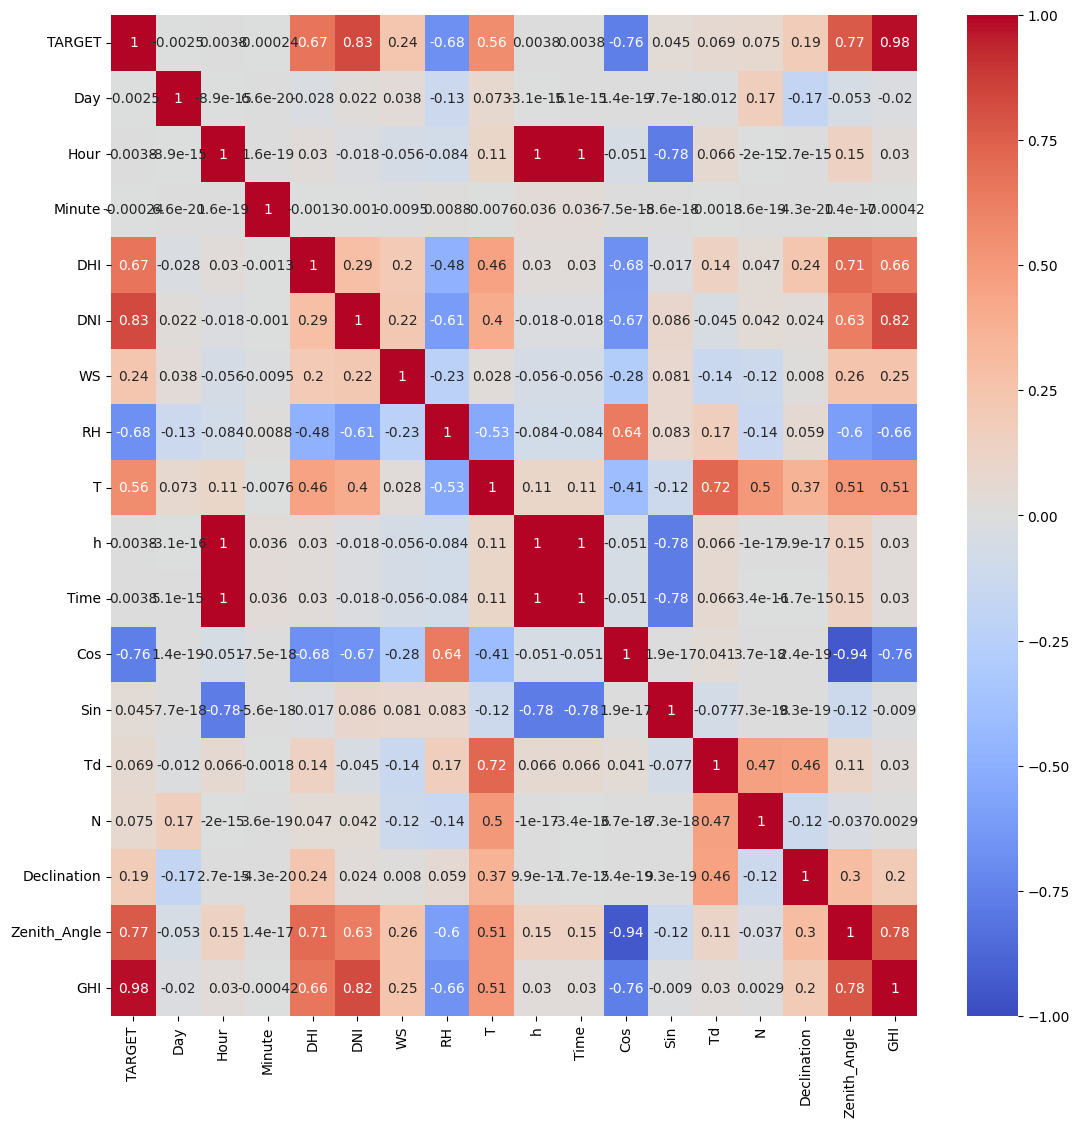

In [428]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

df_pair = train[['TARGET', 'Day', 'Hour', 'Minute', 'DHI', 'DNI', 'WS', 'RH', 'T',	'h','Time', 'Cos','Sin','Td','N','Declination','Zenith_Angle','GHI']]


plt.gcf().set_size_inches(13, 13)
sns.heatmap(df_pair.corr(), vmin = -1, vmax = +1, annot = True, cmap = 'coolwarm');

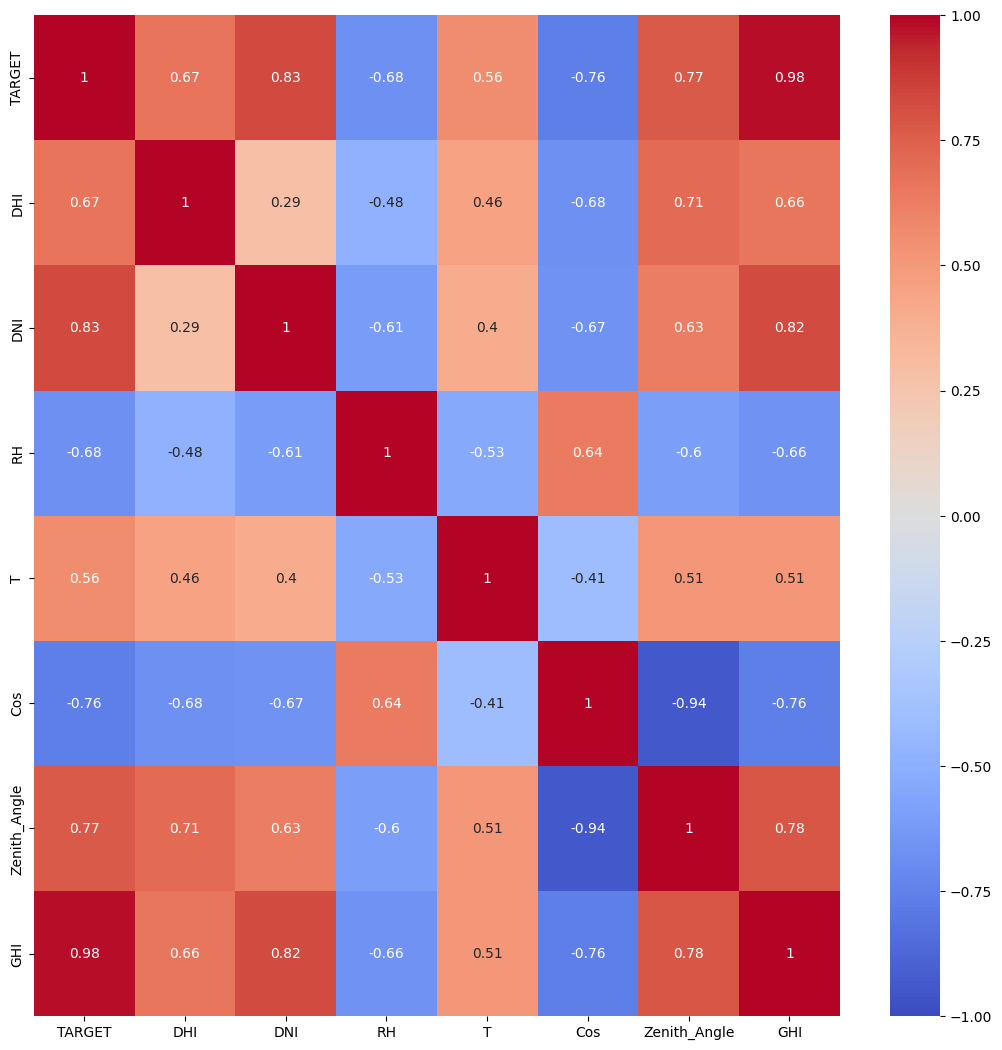

In [429]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

df_pair = train[['TARGET', 'DHI', 'DNI', 'RH', 'T', 'Cos','Zenith_Angle','GHI']]


plt.gcf().set_size_inches(13, 13)
sns.heatmap(df_pair.corr(), vmin = -1, vmax = +1, annot = True, cmap = 'coolwarm');

In [463]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

x_train=train.drop(['Sin','Td','N','Declination', 'h','Time', 'WS','Day', 'Hour', 'Minute', 'TARGET'], axis=1)
y_train=train['TARGET']
x_test=test.drop(['Sin','Td','N','Declination', 'h','Time', 'WS','Day', 'Hour', 'Minute', 'TARGET'], axis=1)
y_test=test['TARGET']

In [464]:
x_test.head()
#'Sin','Td','N','Declination', 'h','Time', 'WS','Day', 'Hour', 'Minute'
#'Day', 'Hour','WS', 'Td','Minute', 'TARGET','h','N','Declination','Zenith_Angle','Time','Sin'

,DHI,DNI,RH,T,Cos,Zenith_Angle,GHI
0,0,0,34.42,0.0,1.000000,-0.963497,0.0
1,0,0,34.17,0.1,0.991445,-0.969722,0.0
2,0,0,34.23,0.2,0.965926,-0.963497,0.0
3,0,0,33.99,0.3,0.923880,-0.944927,0.0
4,0,0,33.97,0.4,0.866025,-0.914330,0.0


In [465]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [466]:
torch.manual_seed(42)

In [467]:
device = torch.device('cuda')

In [468]:
x_train_np = x_train.to_numpy()
y_train_np = y_train.to_numpy()
x_test_np = x_test.to_numpy()
y_test_np = y_test.to_numpy()

In [469]:
x_train_np = torch.FloatTensor(x_train_np).to(device)
y_train_np = torch.FloatTensor(y_train_np).to(device)
x_test_np = torch.FloatTensor(x_test_np).to(device)
y_test_np = torch.FloatTensor(y_test_np)

In [470]:
y_train_np = y_train_np.view([-1,1])
y_test_np = y_test_np.view([-1,1])

In [471]:
print(x_train_np.shape)
print(y_train_np.shape)
print(x_test_np.shape)
print(y_test_np.shape)

torch.Size([52560, 7])
torch.Size([52560, 1])
torch.Size([27216, 7])
torch.Size([27216, 1])


In [472]:
class MultivariateLinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_1 = nn.Linear(7, 7, bias = True)
        self.linear_2 = nn.Linear(7, 6, bias = True)
        self.linear_3 = nn.Linear(6, 5, bias = True)
        self.linear_4 = nn.Linear(5, 4, bias = True)
        self.linear_5 = nn.Linear(4, 3, bias = True)
        self.linear_6 = nn.Linear(3, 2, bias = True)
        self.linear_7 = nn.Linear(2, 1, bias = True)
        self.sig = nn.Sigmoid()
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.linear_1(x)
        x = self.relu(x)
        x = self.linear_2(x)
        x = self.relu(x)
        x = self.linear_3(x)
        x = self.relu(x)
        x = self.linear_4(x)
        x = self.relu(x)
        x = self.linear_5(x)
        x = self.relu(x)
        x = self.linear_6(x)
        x = self.relu(x)
        x = self.linear_7(x)
        x = self.relu(x)
        return x

In [473]:
# optimizer 설정

model = MultivariateLinearRegressionModel().to(device)
optimizer = optim.Adam(model.parameters(), lr=1e-3)

nb_epochs = 20000
for epoch in range(nb_epochs + 1):
    optimizer.zero_grad()

    # Cost 계산
    prediction = model(x_train_np) # or .mm or @
    cost = F.mse_loss(prediction, y_train_np)
    # cost = -(y_train_np * torch.log(hypothesis) + 
            #  (1 - y_train_np) * torch.log(1 - hypothesis)).mean()

    # cost로 H(x) 개선
    cost.backward()
    optimizer.step()

    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))

Epoch    0/20000 Cost: 979.708801
Epoch  100/20000 Cost: 134.408417
Epoch  200/20000 Cost: 40.431957
Epoch  300/20000 Cost: 15.218781
Epoch  400/20000 Cost: 14.009677
Epoch  500/20000 Cost: 13.452234
Epoch  600/20000 Cost: 13.032848
Epoch  700/20000 Cost: 12.692772
Epoch  800/20000 Cost: 12.341403
Epoch  900/20000 Cost: 11.981441
Epoch 1000/20000 Cost: 11.567889
Epoch 1100/20000 Cost: 11.116418
Epoch 1200/20000 Cost: 10.683379
Epoch 1300/20000 Cost: 10.337942
Epoch 1400/20000 Cost: 9.964869
Epoch 1500/20000 Cost: 9.703970
Epoch 1600/20000 Cost: 9.464417
Epoch 1700/20000 Cost: 9.202843
Epoch 1800/20000 Cost: 8.904058
Epoch 1900/20000 Cost: 8.527979
Epoch 2000/20000 Cost: 7.950901
Epoch 2100/20000 Cost: 7.439240
Epoch 2200/20000 Cost: 7.229896
Epoch 2300/20000 Cost: 7.081768
Epoch 2400/20000 Cost: 6.966347
Epoch 2500/20000 Cost: 6.836471
Epoch 2600/20000 Cost: 6.711427
Epoch 2700/20000 Cost: 6.571432
Epoch 2800/20000 Cost: 6.413794
Epoch 2900/20000 Cost: 6.253554
Epoch 3000/20000 Cost: 6

In [474]:
y_test_tor = model(x_train_np)
y_test_tor = y_test_tor.cpu().detach().numpy()
y_test_tor = pd.DataFrame(y_test_tor)

In [485]:
y_test_np =  pd.DataFrame(y_test_np)

In [480]:
y_test_pred.head(20)

,0
0,0.041104
1,0.041104
2,0.041104
3,0.041104
4,0.041104
5,0.041104
6,0.041104
7,0.041104
8,0.041104
9,0.041104


In [486]:
y_test_np.head(20)

,0
0,0.000000
1,0.000000
2,0.000000
3,0.000000
4,0.000000
5,0.000000
6,0.000000
7,0.000000
8,0.000000
9,0.000000


In [460]:
y = pd.concat([y_test_tor[:48*7],y_test[:48*7]],axis=1)

In [461]:
y.columns = ['Y_Pred', 'Y_Test']

<AxesSubplot:>

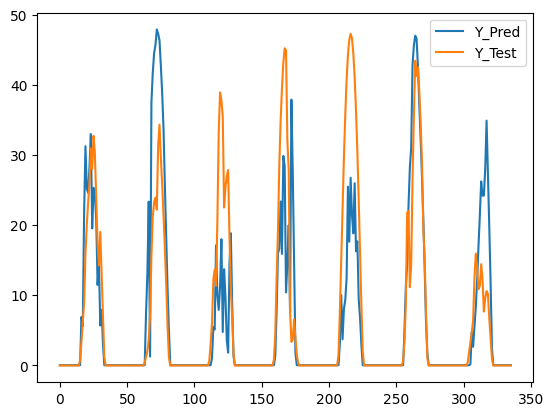

In [462]:
y.plot()